In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import buildcat

Actions that have no inputs, and a single output:

INFO:buildcat.process:Environment: buildcat.process.Environment(cwd='/Users/tshead/src/buildcat/sandbox')
INFO:buildcat.process:Running: buildcat.action.Shell(command="echo 'Hello, World!' > {target}")
DEBUG:buildcat.action:Shell: echo 'Hello, World!' > /Users/tshead/src/buildcat/sandbox/hello.txt
INFO:buildcat.process:Running: buildcat.action.TouchFile()
INFO:buildcat.process:Running: buildcat.action.MakeDirectory()


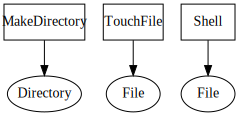

In [2]:
process = buildcat.Process()

process.add_action(
    buildcat.MakeDirectory(),
    outputs=buildcat.Directory("output-directory"),
)
process.add_action(
    buildcat.TouchFile(),
    outputs=buildcat.File("lockfile"),
)
process.add_action(
    buildcat.Shell("echo 'Hello, World!' > {target}"),
    outputs=buildcat.File("hello.txt"),
)
process.run()

Actions that have no inputs, and multiple outputs:

INFO:buildcat.process:Environment: buildcat.process.Environment(cwd='/Users/tshead/src/buildcat/sandbox')
INFO:buildcat.process:Running: buildcat.action.Shell(command='touch {targets[0]}; touch {targets[1]}')
DEBUG:buildcat.action:Shell: touch /Users/tshead/src/buildcat/sandbox/file-a; touch /Users/tshead/src/buildcat/sandbox/file-b


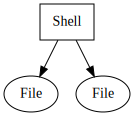

In [3]:
process = buildcat.Process()

process.add_action(
    buildcat.Shell("touch {targets[0]}; touch {targets[1]}"),
    outputs=[buildcat.File("file-a"), buildcat.File("file-b")],
)
process.run()

Actions that have one input and multiple outputs:

In [4]:
process = buildcat.Process()

process.add_action(
    buildcat.Action(),
    outputs=[buildcat.Target(), buildcat.Target()],
    inputs=buildcat.Target(),
)
process.run()

TypeError: Can't instantiate abstract class Target with abstract methods exists